## Imports

In [1]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [2]:
def solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy, c):

    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    ##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    for n in range(ny):
        for i in range(1,ny):
            for j in range(1,nx):
                u[i,j]=u[i,j]-u[i,j]*c*dt/dx*(u[i,j]-u[i-1,j])-v[i,j]*c*dt/dy*(u[i,j]-u[i,j-1])
                v[i,j]=v[i,j]-u[i,j]*c*dt/dx*(v[i,j]-v[i-1,j])-v[i,j]*c*dt/dy*(v[i,j]-v[i,j-1])
        #u=un
        #un=u
        #v=vn
        #vn=v
    #fill the update of u and v
        u[0, :] = 1
        u[ny-1, :] = 1
        u[:, 0] = 1
        u[:, nx-1] = 1
        v[0, :] = 1
        v[ny-1, :] = 1
        v[:, 0] = 1
        v[:, nx-1] = 1
        
    return 0

## Numba accelerator

In [3]:
@njit(fastmath=True)
def solve_2d_nonlinearconv_numba(u, un, v, vn, nt, dt, dx, dy, c):

    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    ##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    for n in range(ny):
        for i in range(1,ny):
            for j in range(1,nx):
                u[i,j]=u[i,j]-u[i,j]*c*dt/dx*(u[i,j]-u[i-1,j])-v[i,j]*c*dt/dy*(u[i,j]-u[i,j-1])
                v[i,j]=v[i,j]-u[i,j]*c*dt/dx*(v[i,j]-v[i-1,j])-v[i,j]*c*dt/dy*(v[i,j]-v[i,j-1])
        #u=un
        #un=u
        #v=vn
        #vn=v
        u[0, :] = 1
        u[ny-1, :] = 1
        u[:, 0] = 1
        u[:, nx-1] = 1
        v[0, :] = 1
        v[ny-1, :] = 1
        v[:, 0] = 1
        v[:, nx-1] = 1
    #fill the update of u and v
        
    return 0

## Pyccel accelerator

In [4]:
@types('float[:,:]', 'float[:,:]','float[:,:]', 'float[:,:]', 'int','float', 'float','float', 'float')
def solve_2d_nonlinearconv_pyccel(u, un, v, vn, nt, dt, dx, dy, c):

    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    ##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    for n in range(nt):
        for i in range(1,row):
            for j in range(1,col):
                u[i,j]=u[i,j]-u[i,j]*c*dt/dx*(u[i,j]-u[i-1,j])-v[i,j]*c*dt/dy*(u[i,j]-u[i,j-1])
                v[i,j]=v[i,j]-u[i,j]*c*dt/dx*(v[i,j]-v[i-1,j])-v[i,j]*c*dt/dy*(v[i,j]-v[i,j-1])
        u[0, :] = 1
        u[row-1, :] = 1
        u[:, 0] = 1
        u[:, col-1] = 1
        v[0, :] = 1
        v[row-1, :] = 1
        v[:, 0] = 1
        v[:, col-1] = 1       
      
    
    #fill the update of u and v
        
    return 0

## Inputs

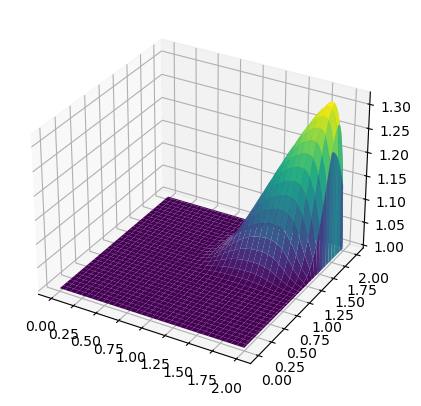

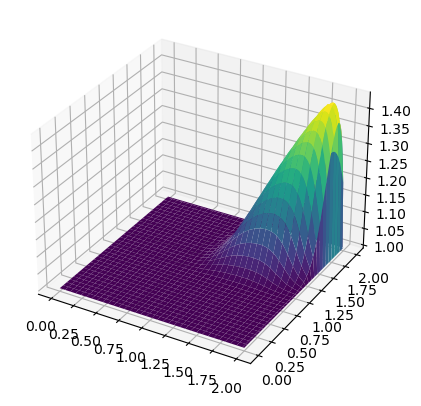

In [5]:
###variable declarations
nx = 101
ny = 101
nt = 80
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx)) ##create a 1xn vector of 1's
v = np.ones((ny, nx))
un = np.ones((ny, nx))
vn = np.ones((ny, nx))     

solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy, c)

fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u, cmap=cm.viridis)


fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, v, cmap=cm.viridis)

## Call Funtions

### Pure function

In [6]:
%timeit solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy, c)

12.7 s ± 146 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with numba accelerator

In [7]:
%timeit solve_2d_nonlinearconv_numba(u, un, v, vn, nt, dt, dx, dy, c)

10.7 ms ± 18.2 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with pyccel accelerator

In [8]:
solve_2d_nonlinearconv_f90 = epyccel(solve_2d_nonlinearconv_pyccel)

In [9]:
%timeit solve_2d_nonlinearconv_f90(u, un, v, vn, nt, dt, dx, dy, c)

20.2 ms ± 128 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
